# Data Science and Business Analytics Internship- Grip May'21¶

## Task6: Prediction Using Decision Tree

### Author: Rashi Khandelwal

#### Step1:- Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Step2:- Loading Data

In [2]:
df= pd.read_csv("Iris.csv",error_bad_lines=False,encoding='latin-1')

#### Step3:- Reading the Data

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df= df.iloc[:,1:]

In [7]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Step4:- Exploratory Data Analysis

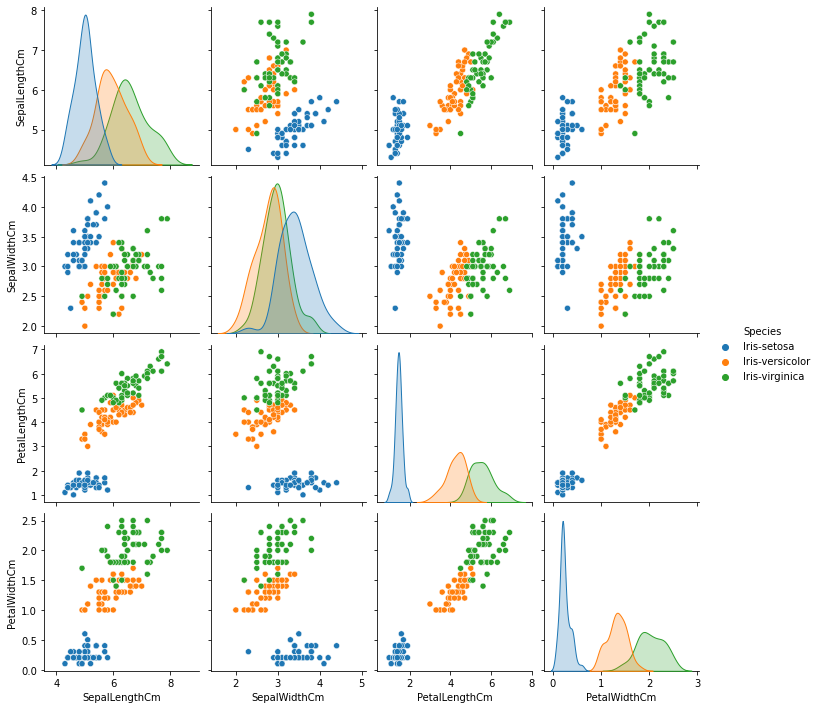

In [8]:
sns.pairplot(df, hue= "Species")

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


<AxesSubplot:>

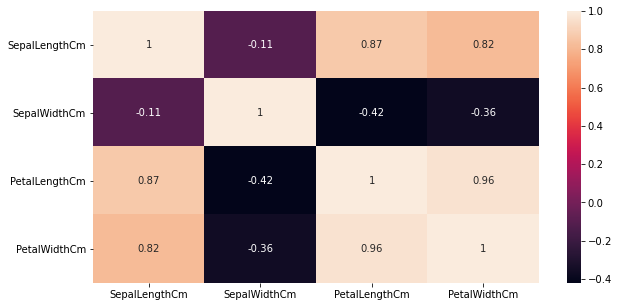

In [10]:
plt.figure(figsize=(10,5))
print(df.corr())
sns.heatmap(df.corr(),annot=True)

#### Step5:- Splitting The Data

In [11]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
X= df.iloc[:,:4].values
y= df.iloc[:,-1].values

In [13]:
X.shape

(150, 4)

In [14]:
y.shape

(150,)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=2)

In [17]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


#### Step6:- Defining the Model

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
clf= DecisionTreeClassifier()

In [20]:
clf.fit(X,y)

DecisionTreeClassifier()

#### Step7:- Visualizing the Model

In [21]:
from sklearn.tree import plot_tree

<function matplotlib.pyplot.show(close=None, block=None)>

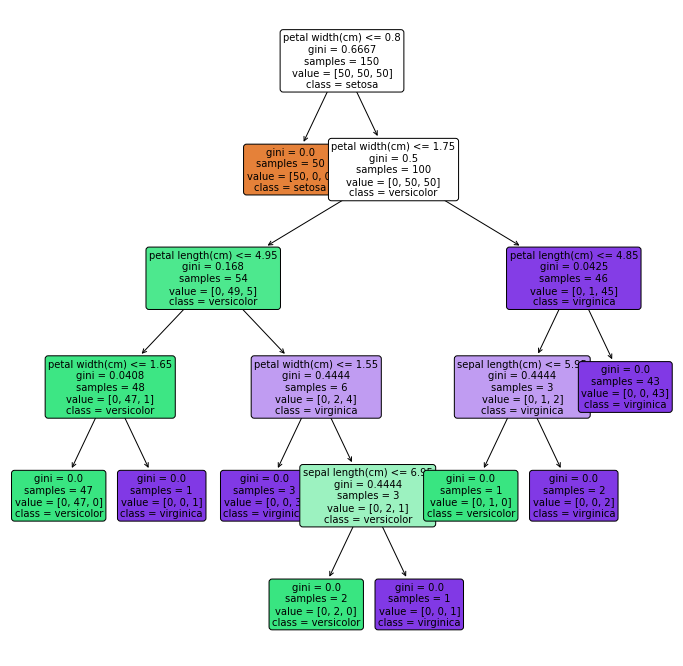

In [22]:
fnames=['sepal length(cm)', 'sepal width(cm)', 'petal length(cm)', 'petal width(cm)']
cnames=['setosa','versicolor','virginica']
plt.figure(figsize=(12,12))
plot_tree(clf,fontsize=10, feature_names= fnames, class_names= cnames,  filled=True, precision =4, rounded= True)
plt.show

#### Step8:- Model Evaluation

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
# finding maximum depth for test model
accuracy= []
for i in range(1,21):
    clf= DecisionTreeClassifier(max_depth=i)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy.append(accuracy_score(y_test,y_pred))

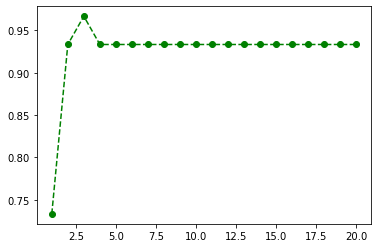

In [25]:
plt.plot(range(1,21),accuracy, 'go--')

In [26]:
# finding maximum depth for training model
accuracy1= []
for i in range(1,21):
    clf= DecisionTreeClassifier(max_depth=i)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_train)
    accuracy1.append(accuracy_score(y_train,y_pred))

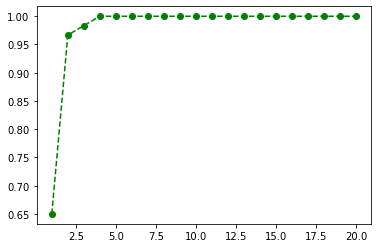

In [27]:
plt.plot(range(1,21),accuracy1, 'go--')

###### clearly the maximum depth should be 4

In [28]:
clf1= DecisionTreeClassifier(max_depth=4)

In [29]:
clf1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [30]:
y_pred=clf1.predict(X_test)

In [31]:
accuracy_score(y_test,y_pred)

0.9333333333333333